### Your goal: wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.


## 1. Gather Data

In [1081]:
#import the required modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import os
import requests
import glob
import wptools
import json
import time
import tweepy
from functools import reduce
import re

In [1105]:
# Import the WeRateDogs Twitter archive file into a DataFrame
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv", sep=',')
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None


In [889]:
## download the tweet image predictions file programmatically from udacity cloud server

url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response=requests.get(url)
file_name=url.rsplit('/', 1)[-1]
print(file_name)
with open(file_name,'wb') as file:
    file.write(response.content)

image-predictions.tsv


In [890]:
## open the tweet image prediction file in image prediction dataframe

image_prediction = pd.read_csv("image-predictions.tsv", sep='\t')
image_prediction.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [5]:
## query the twitter API to download JSON format data and save it in a text file
## the dataframe should have following minimum parameters - tweet id, retweet count and favorite count
## this autoization data needs to be removed before submission##
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:
##Tweet data is stored in JSON format by Twitter. Getting tweet JSON data via tweet ID using Tweepy 
#is described well in this StackOverflow answer. Note that setting the tweet_mode parameter to 'extended' 
#in the get_status call, i.e., api.get_status(tweet_id, tweet_mode='extended'), can be useful.

tweet1 = api.get_status(892420643555336193,tweet_mode='extended')
#print(tweet1._json['text'])
        


In [7]:
## Remove tweet_json file, if it already exists on location
filename='tweet_json.txt'
if os.path.exists(filename):
    os.remove(filename)
    


In [8]:
tweets_list= list(twitter_archive.tweet_id)
start = time.time()



tweets_processed = []
tweets_fail = []
count=0
with open(filename, 'a',encoding='utf8') as file:
    for tweet_id in tweets_list:
        try:
            count+=1
            if (count%20==0):
                print("Count is {}".format(count))
            tweet = api.get_status(tweet_id,tweet_mode='extended')
            json.dump(tweet._json, file)   
            file.write('\n')
            tweets_processed.append(tweet_id)
        except tweepy.TweepError as te:
            print("Failed to get tweet ID {} {}".format(tweet_id, te.reason))
            tweets_fail.append(tweet_id)

end = time.time()  
print(end - start)

Count is 20
Failed to get tweet ID 888202515573088257 [{'code': 144, 'message': 'No status found with that ID.'}]
Count is 40
Count is 60
Count is 80
Failed to get tweet ID 873697596434513921 [{'code': 144, 'message': 'No status found with that ID.'}]
Count is 100
Failed to get tweet ID 869988702071779329 [{'code': 144, 'message': 'No status found with that ID.'}]
Count is 120
Failed to get tweet ID 866816280283807744 [{'code': 144, 'message': 'No status found with that ID.'}]
Count is 140
Failed to get tweet ID 861769973181624320 [{'code': 144, 'message': 'No status found with that ID.'}]
Count is 160
Count is 180
Count is 200
Count is 220
Count is 240
Failed to get tweet ID 845459076796616705 [{'code': 144, 'message': 'No status found with that ID.'}]
Count is 260
Failed to get tweet ID 842892208864923648 [{'code': 144, 'message': 'No status found with that ID.'}]
Count is 280
Failed to get tweet ID 837012587749474308 [{'code': 144, 'message': 'No status found with that ID.'}]
Count 

In [1106]:
twitter_archive.info()
image_prediction.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [1107]:
# String of path to file: tweets_data_path
tweets_data_path='tweet_json.txt'

# Initialize empty list to store tweets: tweets_data
tweets_list=[]

tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet=json.loads(line)
    #print(tweet,"\n")
    
    tweet_id=tweet['id']
    retweet_count= tweet['retweet_count']
    favorite_count=tweet['favorite_count']
    tweets_list.append({'tweet_id': tweet_id,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})
            
tweets_data = pd.DataFrame(tweets_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
#print(tweets_list)
#print(tweets_data.head(3))

#print(tweets_data.info(3))

## 2. Assess Data
Let's us the following programmtic methods to assess the data.
These are the programmatic assessment methods in pandas that you will probably use most often:

.head (DataFrame and Series)

.tail (DataFrame and Series)

.sample (DataFrame and Series)

.info (DataFrame only)

.describe (DataFrame and Series)

.value_counts (Series only)

Various methods of indexing and selecting data (.loc and bracket notation with/without boolean indexing, also .iloc)
Try them out below and keep their results in mind. Some will come in handy later in the lesson.


In [1108]:
## Lets run head method on all the 3 data frames.
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [1109]:
image_prediction.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [1110]:
tweets_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8610,38854
1,892177421306343426,6324,33282
2,891815181378084864,4197,25076
3,891689557279858688,8722,42231
4,891327558926688256,9492,40383


In [1111]:
## Lets run info method on all the 3 data frames.

twitter_archive.info()

##https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object
## timestamp column should be a timestamp and not string variable
##in_reply_to_status_id and in_reply_to_user_id should be integer and not float. 
## retweeted_status_timestamp column should be a timestamp and not string variable
## retweeted_status_id  and retweeted_status_user_id should be integer and not float. 
## all the other variables are fine 
##

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [1112]:
image_prediction.info()
## data types seem to be correct for all the parameters except p1_dog,p2_dog and p3_dog. 
#they should be categorical instead of boolean.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [1113]:
tweets_data.info()

## tweets_data seems to be fine.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
tweet_id          2340 non-null int64
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [1114]:
twitter_archive.sample(5)
#image_prediction.sample(5)
#tweets_data.sample(5)

## Name of dog id not correct

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2135,670061506722140161,NaN,NaN,2015-11-27 02:08:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Liam. He has a particular set of skills. He will look for you, he will find you, and he will kill you. 11/10 https://t.co/uQMFKv1vjn",NaN,NaN,NaN,https://twitter.com/dog_rates/status/670061506722140161/photo/1,11,10,Liam,None,None,None,None
1938,673906403526995968,NaN,NaN,2015-12-07 16:46:21 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys I'm getting real tired of this. We only rate dogs. Please don't send in other things like this Bulbasaur. 3/10 https://t.co/t5rQHl6W8M,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673906403526995968/photo/1,3,10,None,None,None,None,None
899,758828659922702336,NaN,NaN,2016-07-29 00:57:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This doggo is just waiting for someone to be proud of her and her accomplishment. 13/10 legendary af https://t.co/9T2h14yn4Q,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758828659922702336/photo/1,13,10,None,doggo,None,None,None
1450,695816827381944320,NaN,NaN,2016-02-06 03:50:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a dog enjoying a sunset. 11/10 would trade lives with https://t.co/VsQdLxrv9h,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695816827381944320/photo/1,11,10,None,None,None,None,None
1036,744971049620602880,NaN,NaN,2016-06-20 19:11:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Indie and Jupiter. They're having a stellar day out on the boat. Both 12/10 adorbz af https://t.co/KgSEkrPA3r,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/744971049620602880/photo/1,https://twitter.com/dog_rates/status/744971049620602880/photo/1,https://twitter.com/dog_rates/status/744971049620602880/photo/1",12,10,Indie,None,None,None,None


In [1115]:
#twitter_archive.describe()
image_prediction.describe()
tweets_data.describe()



,tweet_id,retweet_count,favorite_count
count,2.340000e+03,2340.000000,2340.000000
mean,7.424373e+17,3037.121368,8093.029060
std,6.833883e+16,5046.805120,12165.244855
min,6.660209e+17,0.000000,0.000000
25%,6.783989e+17,608.000000,1410.500000
50%,7.193360e+17,1429.000000,3548.000000
75%,7.987029e+17,3535.500000,9996.750000
max,8.924206e+17,77489.000000,143588.000000


In [1116]:
#twitter_archive[twitter_archive.duplicated()]
#image_prediction[image_prediction.duplicated()]
#tweets_data[tweets_data.duplicated()]

## there are no duplicates in the data for all the cases

In [1117]:
all_columns = pd.Series(list(twitter_archive) + list(image_prediction) + list(tweets_data))
all_columns[all_columns.duplicated()]


## there are no duplicate columns in the dataset

17    tweet_id
29    tweet_id
dtype: object

In [1118]:
## now it is a time for value counts

twitter_archive.name.value_counts()

## twitter archive
# source is an important attribute.. let's review this column later
## Rating numerator and denominator needs to be reviewed
## Names- None repeats 745 times, 'a' repeats 55 times , Bo repeats 9 times and an repeats 7 times. 
## Charlie and Lucy are most common names for a dog.


None         745
a            55 
Charlie      12 
Cooper       11 
Oliver       11 
Lucy         11 
Penny        10 
Tucker       10 
Lola         10 
Winston      9  
Bo           9  
Sadie        8  
the          8  
an           7  
Bailey       7  
Buddy        7  
Toby         7  
Daisy        7  
Rusty        6  
Stanley      6  
Jack         6  
Scout        6  
Koda         6  
Leo          6  
Oscar        6  
Jax          6  
Dave         6  
Milo         6  
Bella        6  
Alfie        5  
            ..  
Jeffrie      1  
Strudel      1  
Ralphy       1  
Hubertson    1  
Wishes       1  
Kara         1  
Skye         1  
Rose         1  
Norman       1  
Stephanus    1  
Blanket      1  
Pippin       1  
Molly        1  
Coleman      1  
Rupert       1  
Monster      1  
Cuddles      1  
Tessa        1  
Pinot        1  
Jennifur     1  
Blue         1  
Willy        1  
Rontu        1  
Howie        1  
Pilot        1  
Reptar       1  
Maxwell      1  
Strider      1

In [1119]:
# View rows where the value of 'name' is lowercase - indicates that it is not an actual name
twitter_archive.loc[(twitter_archive['name'].str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-announces-its-first-ever-ark-oasis-animal-terminal-001480161.html?sbdht=_pM1QUzk3wsdTxcmMoRPV7FWYYlsNKcFRcYSY7OmeHnOXA4NtUM6PLQ2_,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1",14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024703037440/photo/1,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog

In [1120]:
# View rows where the value of 'name' is lowercase - indicates that it is not an actual name
twitter_archive.loc[(twitter_archive['name'].str.islower())].count()

## there are 109 such records.. aside from names which are none.

tweet_id                      109
in_reply_to_status_id         0  
in_reply_to_user_id           0  
timestamp                     109
source                        109
text                          109
retweeted_status_id           5  
retweeted_status_user_id      5  
retweeted_status_timestamp    5  
expanded_urls                 109
rating_numerator              109
rating_denominator            109
name                          109
doggo                         109
floofer                       109
pupper                        109
puppo                         109
dtype: int64

In [1121]:
## check that whether we have any duplicate tweets in data
print(twitter_archive[twitter_archive.tweet_id.duplicated()])
print(image_prediction[image_prediction.tweet_id.duplicated()])
print(tweets_data[tweets_data.tweet_id.duplicated()])

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []
Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []
Empty DataFrame
Columns: [tweet_id, retweet_count, favorite_count]
Index: []


In [1122]:
## check tweets for which expanded URL is null

twitter_archive[twitter_archive.expanded_urls.isnull()]
#twitter_archive[twitter_archive.expanded_urls.isnull()].count()

## there are 59 such records in the system

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Jenna_Marbles: @dog_rates Thanks for rating my cermets 14/10 wow I'm so proud I watered them so much,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [1123]:
## Find retweets which are appearing in orignal tweets, they should be removed.
twitter_archive[twitter_archive.retweeted_status_id.isin(twitter_archive.tweet_id)].count()

tweet_id                      112
in_reply_to_status_id         0  
in_reply_to_user_id           0  
timestamp                     112
source                        112
text                          112
retweeted_status_id           112
retweeted_status_user_id      112
retweeted_status_timestamp    112
expanded_urls                 112
rating_numerator              112
rating_denominator            112
name                          112
doggo                         112
floofer                       112
pupper                        112
puppo                         112
dtype: int64

In [1124]:
## Check the source column

twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

**Findings*
df.head(4), df.sample(4), df.info(), df.describe(), df['col'].value_counts(), df['col'].sort_values(), df[condition].loc[], df[df['col'].duplicated()] sum(df['col'].isnull())

**[Tidiness] (structure issue)**:

- In image prediction table, stages of dog (doggo,floofer,pupper and puppo) variables are in 4 separate column. However, this information should be available in single column.
- The twitter data for analysis should be in single table so  twitter archive, image prediction and tweets data table should be combined.

**[Quality] (contents issue)**:

`In twitter archive table`:
- tweet_id should be string as descriptive analytics cannot be performed on this.
- timestamp column should be date time variable.
- retweeted_status_timestamp column should be date time variable.
- Tweets with no images. i.e expanded URL is null.
- retweets should be removed. 
- There are link in the source column. Let's only keep the relevant text and remove url.
- Ratings are not extracted properly. Ratings should be extracted from text column and denominator for all records should be 10. 
- Name column needs to be cleaned. Names of dogs are mispelled, incorrect. Let's see, if we can clean few names. 
    e.g.- None repeats 745 times, 'a' repeats 55 times , Bo repeats 9 times and an repeats 7 times. Also, there are few lowercase incorrect names which are repeated several times. total - 109 such names.
- Separate columns should be there for tweet date and time ( Timestamp Column). It will help us to perform better analysis.
- Columns which are not required for analysis should be removed from dataset
 
`In Image prediction table`:

- tweet_id should be string
- Let's keep the dog breed and confidence level for true preduction.


`In tweets data table` :

- tweet_id should be string



## 3 Clean Data

Let's clean data

In [1125]:
## Let's create a copy of our dataframes

twitter_archive_copy = twitter_archive.copy()
image_prediction_copy = image_prediction.copy()
tweets_data_copy = tweets_data.copy()


### A. Quality Issues

**Define**

1. Change tweet_id datatype from int to string as descriptive analytics cannot be performed on this.


**Code**

In [1126]:
twitter_archive_copy.tweet_id=twitter_archive_copy.tweet_id.astype(str)
image_prediction_copy.tweet_id = image_prediction_copy.tweet_id.astype(str)
tweets_data_copy.tweet_id = tweets_data_copy.tweet_id.astype(str)
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

**Test**

In [1127]:
## Data type of tweet_id is object now.
print("tweet_id data type in twitter_archive_copy is : {}".format(twitter_archive_copy.tweet_id.dtype))
print("tweet_id data type in image_prediction_copy is : {}".format(image_prediction_copy.tweet_id.dtype))
print("tweet_id data type in tweets_data_copy is : {}".format(tweets_data_copy.tweet_id.dtype))


tweet_id data type in twitter_archive_copy is : object
tweet_id data type in image_prediction_copy is : object
tweet_id data type in tweets_data_copy is : object


**Define**

2.Change "timestamp" and "retweet_status_timestamp" datatype from string to datetime.

**Code**

In [1128]:
twitter_archive_copy.timestamp=pd.to_datetime(twitter_archive_copy.timestamp)
twitter_archive_copy.retweeted_status_timestamp=pd.to_datetime(twitter_archive_copy.retweeted_status_timestamp)


**Test**

In [1129]:
print(twitter_archive_copy.timestamp.head())
retweet_notnull=twitter_archive_copy.retweeted_status_timestamp.notnull()
print(twitter_archive_copy[retweet_notnull].retweeted_status_timestamp.head())

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]
19   2017-07-19 00:47:34
32   2017-07-15 02:44:07
36   2017-02-12 01:04:29
68   2017-06-23 01:10:23
73   2017-06-23 16:00:04
Name: retweeted_status_timestamp, dtype: datetime64[ns]


**Define**

3.Remove tweets with no image url.i.e expanded URL is null.


**Code**

In [1130]:
print(sum(twitter_archive_copy.expanded_urls.isnull()))
twitter_archive_copy = twitter_archive_copy.dropna(subset=['expanded_urls'])

59


**Test**

In [1131]:
sum(twitter_archive_copy.expanded_urls.isnull())

## there should be no observations in the dataset now with expanded_urls as null.

0

**Define**

4.Keep the first true prediction and confidence level. Let's drop all the other fields

**Code**

In [1132]:
dog_breed =[]
confidence_level=[]

def dog_breed_prediction(df):
    if df['p1_dog']:
        dog_breed.append(df['p1'])
        confidence_level.append(df['p1_conf'])
    elif df['p2_dog']:
        dog_breed.append(df['p2'])
        confidence_level.append(df['p2_conf'])  
    elif df['p3_dog']:
        dog_breed.append(df['p3'])
        confidence_level.append(df['p3_conf']) 
    else :
        dog_breed.append('None')
        confidence_level.append(0)

##use dataframe.apply() to iterate over rows and access multiple columns for a function.

## Reference : https://erikrood.com/Python_References/iterate_rows_pandas.html


image_prediction_copy.apply(dog_breed_prediction, axis=1)
image_prediction_copy['dog_breed'] = dog_breed
image_prediction_copy['confidence_level'] = confidence_level


In [1133]:
## Drop other columns 


image_prediction_copy = image_prediction_copy.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1)





**Test**


In [1134]:
## check whether the redundant columns pertaining to image prediction are deleted.
image_prediction_copy.head()

,tweet_id,jpg_url,dog_breed,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


**Define**

5.Extract relevant information from the source column.

**Code**

In [1135]:
## extract source informatiomn

def sourcedata(data):
    return re.findall(r">([\w\W\s*]*)<",data)[0]
   
twitter_archive_copy['source']=twitter_archive_copy['source'].apply(sourcedata)    



**Test**

In [1136]:
## Source field is now cleaned
twitter_archive_copy['source'].value_counts()

Twitter for iPhone     2163
Vine - Make a Scene    91  
Twitter Web Client     32  
TweetDeck              11  
Name: source, dtype: int64

**Define**

6.Remove tweets that have a retweeted_status because it is not original tweet.

**Code**

In [1137]:
##df_clean[df_clean['retweeted_status_id'].notnull()==True]
subset=twitter_archive_copy['retweeted_status_id'].notnull()== True

twitter_archive_copy.drop(twitter_archive_copy[subset].index,inplace=True)

**Test**

In [1138]:
## No rows should be returned when we run below code . As row with not null retweeted_status_id are removed.
twitter_archive_copy[twitter_archive_copy['retweeted_status_id'].notnull()==True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


**Define**

7.Extract correct ratings from the text and put them in the numerator and denominator

**Code**

In [1139]:
ratings=twitter_archive_copy.text.str.extract('(\d*\.?\d+/10)', expand=True)

ratings[0].fillna('0/10', inplace=True )

rating_numerator_new=[]

for i in range(len(ratings.index)):
     temp = str(ratings.iloc[i][0]).strip().split('/')[0]
     rating_numerator_new.append(temp)
#str1 = ' '.join(str(e) for e in rating_numerator_new)    
twitter_archive_copy['rating_numerator_new']=rating_numerator_new
twitter_archive_copy['rating_numerator_new']=twitter_archive_copy.rating_numerator_new.str.extract('(\d+)', expand=True).astype(int)
#tweets_data_df['rating_numerator_new'] = tweets_data_df.rating_numerator_new.astype(int)
twitter_archive_copy['rating_denominator_new']=10
#print(str1.extract('(\d+)', expand=True))
print(twitter_archive_copy.info())
twitter_archive_copy.rating_numerator_new.value_counts()
twitter_archive_copy.rating_denominator_new.value_counts()    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2117 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null datetime64[ns]
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
rating_numerator_new 

10    2117
Name: rating_denominator_new, dtype: int64

**Test**

In [1140]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2117 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null datetime64[ns]
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
rating_numerator_new 

**Define**

8.Extract correct dog names from text field

**Code**

In [1141]:
dog_names=[]
for index,text in enumerate(twitter_archive_copy['text']):
    dog_name=twitter_archive_copy.iloc[index]['name']
    if not(dog_name.islower() or dog_name=='None'):
       dog_names.append(dog_name)
    elif 'named' in text:
        dog_names.append(re.search('named(\s\w+)',text).group(1).strip(' '))
       #dog_names.append(text.split()[text.split().index('named') + 1].strip(',').strip('.'))
    # Start with 'This is ' and the fisrt letter of the name is uppercase
    elif text.startswith('This is')and re.match(r'[A-Z].*', text.split()[2]):
        dog_names.append(re.search('This is(\s\w+)',text).group(1).strip(' '))
        
    elif text.startswith('Here is ') and re.match(r'[A-Z].*', text.split()[2]):
        dog_names.append(re.search('Here is(\s\w+)',text).group(1).strip(' '))
        # Start with 'Meet ' and the fisrt letter of the name is uppercase
    elif text.startswith('Meet ') and re.match(r'[A-Z].*', text.split()[1]):
        dog_names.append(re.search('Meet(\s\w+)',text).group(1).strip(' '))
    # Start with 'Say hello to ' and the fisrt letter of the name is uppercase
    elif text.startswith('Say hello to ')and re.match(r'[A-Z].*', text.split()[3]):
        dog_names.append(re.search('Say hello to(\s\w+)',text).group(1).strip(' '))
    # Start with 'Here we have ' and the fisrt letter of the name is uppercase
    elif text.startswith('Here we have ') and re.match(r'[A-Z].*', text.split()[3]):
        dog_names.append(re.search('Here we have(\s\w+)',text).group(1).strip(' '))
    # Contain 'named' and the fisrt letter of the name is uppercase
    # No name specified or other style
   
    else:
        dog_names.append('None')
        
print(len(dog_names))   
twitter_archive_copy['dog_name'] = dog_names

2117



**Test**

In [1142]:
## There won't be any dog names with lowercase

twitter_archive_copy['dog_name'].value_counts()

None         701
Lucy         11 
Charlie      11 
Oliver       10 
Cooper       10 
Tucker       9  
Penny        9  
Sadie        8  
Winston      8  
Lola         8  
Toby         7  
Daisy        7  
Oscar        6  
Stanley      6  
Koda         6  
Bella        6  
Jax          6  
Bailey       6  
Bo           6  
Rusty        5  
Milo         5  
Buddy        5  
Scout        5  
Louis        5  
Bentley      5  
Chester      5  
Leo          5  
Dave         5  
Jerry        4  
Sammy        4  
            ..  
Shelby       1  
Petrick      1  
Jebberson    1  
Logan        1  
Maxwell      1  
Guss         1  
Reptar       1  
Pilot        1  
Harper       1  
Blanket      1  
Pippin       1  
Molly        1  
Coleman      1  
Rizzy        1  
Creg         1  
Rupert       1  
Cherokee     1  
Monster      1  
Cuddles      1  
General      1  
Tessa        1  
Norman       1  
Pinot        1  
Blue         1  
Willy        1  
Rontu        1  
Chevy        1  
Paull        1

**Define**

9.Create separate columns for Date and Time for timestamp field

**Code**

In [1143]:
twitter_archive_copy['tweet_date'] = twitter_archive_copy['timestamp'].apply(lambda time: time.strftime('%m-%d-%Y'))
twitter_archive_copy['tweet_time'] = twitter_archive_copy['timestamp'].apply(lambda time: time.strftime('%H:%M'))

**Test**

In [1144]:
twitter_archive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,doggo,floofer,pupper,puppo,rating_numerator_new,rating_denominator_new,dog_name,tweet_date,tweet_time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,Phineas,None,None,None,None,13,10,Phineas,08-01-2017,16:23
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,Tilly,None,None,None,None,13,10,Tilly,08-01-2017,00:17
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,Archie,None,None,None,None,12,10,Archie,07-31-2017,00:18
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,Darla,None,None,None,None,13,10,Darla,07-30-2017,15:58
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaT,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,Franklin,None,None,None,None,12,10,Franklin,07-29-2017,16:00


**Define**

10.Remove unwanted columns from the dataset which are not required.
- in_reply_to_status_id
- in_reply_to_user_id
- retweeted_status_id
- retweeted_status_user_id
- retweeted_status_timestamp
- expanded_urls
- rating_numerator  
- rating_denominator
- name
- timestamp

**Code**

In [1145]:
twitter_archive_copy.info()
image_prediction_copy.info()
tweets_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id                      2117 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null datetime64[ns]
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
rating_numerator_new 

In [1146]:

twitter_archive_copy.drop(['in_reply_to_status_id',
                     'in_reply_to_user_id',
                     'retweeted_status_id',
                     'retweeted_status_user_id',
                     'retweeted_status_timestamp',
                     'expanded_urls',
                     'rating_numerator',
                     'rating_denominator',
                     'name',
                     'timestamp'      
                     ], axis=1,inplace=True)

**Test**

In [1147]:
## check the dataframe whether those fields are removed.
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id                  2117 non-null object
source                    2117 non-null object
text                      2117 non-null object
doggo                     2117 non-null object
floofer                   2117 non-null object
pupper                    2117 non-null object
puppo                     2117 non-null object
rating_numerator_new      2117 non-null int64
rating_denominator_new    2117 non-null int64
dog_name                  2117 non-null object
tweet_date                2117 non-null object
tweet_time                2117 non-null object
dtypes: int64(2), object(10)
memory usage: 215.0+ KB


### B. Let's work on tideness issue 

**Define**

Merge all the three dataframe - twitter archive, image predictions and tweets data into single dataframe.

**Code**|

In [1148]:
tweets_df=[twitter_archive_copy,image_prediction_copy,tweets_data_copy]
tweets_data_df = reduce(lambda left,right: pd.merge(left,right,on='tweet_id',how='inner'), tweets_df)

**Test**

In [1149]:
## All the three dataframe merged .. 2064 records in new dataframe.
tweets_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1989 entries, 0 to 1988
Data columns (total 17 columns):
tweet_id                  1989 non-null object
source                    1989 non-null object
text                      1989 non-null object
doggo                     1989 non-null object
floofer                   1989 non-null object
pupper                    1989 non-null object
puppo                     1989 non-null object
rating_numerator_new      1989 non-null int64
rating_denominator_new    1989 non-null int64
dog_name                  1989 non-null object
tweet_date                1989 non-null object
tweet_time                1989 non-null object
jpg_url                   1989 non-null object
dog_breed                 1989 non-null object
confidence_level          1989 non-null float64
retweet_count             1989 non-null int64
favorite_count            1989 non-null int64
dtypes: float64(1), int64(4), object(12)
memory usage: 279.7+ KB


**Define**

Melt the 'doggo', 'floofer', 'pupper', 'puppo' columns to a column 'dog_stage'. Also, drop the 'doggo', 'floofer', 'pupper', 'puppo' column from the tweets_data_df table.

**Code**|

In [1150]:
column=tweets_data_df.columns
value_vars=['doggo', 'floofer', 'pupper', 'puppo']
id_vars=list(column[[not x in value_vars for x in column]])

print(id_vars)




['tweet_id', 'source', 'text', 'rating_numerator_new', 'rating_denominator_new', 'dog_name', 'tweet_date', 'tweet_time', 'jpg_url', 'dog_breed', 'confidence_level', 'retweet_count', 'favorite_count']


In [1151]:
tweets_data_df = pd.melt(tweets_data_df,id_vars,value_vars, var_name = 'stage', value_name = 'dog_stage')

tweets_data_df = tweets_data_df.drop('stage', axis=1)




In [1152]:

tweets_data_df=tweets_data_df.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')

**Test**

In [1153]:
print(tweets_data_df.dog_stage.value_counts())

None       1683
pupper     212 
doggo      63  
puppo      23  
floofer    8   
Name: dog_stage, dtype: int64


### C. Store clean data from on the disk

In [1154]:
tweets_data_df.to_csv('twitter_archive_master.csv',index=False)

### D. Analyse

In [1155]:
twitter_archive= pd.read_csv("twitter_archive_master.csv")
twitter_archive.set_index('tweet_date', inplace=True)
twitter_archive.tweet_id = twitter_archive.tweet_id.astype(str)
twitter_archive.head()
pd.set_option('display.max_colwidth', -1)

### Descriptive  Analysis


In [1156]:
print("Descriptive statistics of the dataset:")
twitter_archive.describe()


Descriptive statistics of the dataset:


,rating_numerator_new,rating_denominator_new,confidence_level,retweet_count,favorite_count
count,1989.000000,1989.0,1989.000000,1989.000000,1989.00000
mean,11.580694,10.0,0.465456,2728.521368,8881.49824
std,40.700594,0.0,0.339506,4706.135807,12595.16566
min,0.000000,10.0,0.000000,13.000000,79.00000
25%,10.000000,10.0,0.140682,611.000000,1955.00000
50%,11.000000,10.0,0.459515,1327.000000,4063.00000
75%,12.000000,10.0,0.776612,3140.000000,11171.00000
max,1776.000000,10.0,0.999956,77489.000000,143588.00000


Below are the takeaways from the descriptive statistics

1. Mean rating for the dogs is 11.58/10.
2. Mean retweet count for an original tweet is 2728 with maximum value of 77489.
3. Mean favorite count for an original tweet is 8881 with maximum value of 143588.
4. Neural network mean confidence level is 0.465.
5. There is a tweet with an outlier rating of 1776. we can further review that tweet.
6. let's also review the records with maximum retweet count and favorite count. 

In [1157]:
twitter_archive[twitter_archive.rating_numerator_new==1776]

,tweet_id,source,text,rating_numerator_new,rating_denominator_new,dog_name,tweet_time,jpg_url,dog_breed,confidence_level,retweet_count,favorite_count,dog_stage
tweet_date,,,,,,,,,,,,,
07-04-2016,749981277374128128,TweetDeck,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10,Atticus,15:00,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,None,0.0,2711,5516,None


The dog name is Atticus and he is the highest rated dog in our dataset. This dog was rated on the independence day. So, It seems that this is the reason why this dog is rated as 1776,which is US independece day. 

In [1158]:
twitter_archive[twitter_archive.retweet_count==77489]
            

,tweet_id,source,text,rating_numerator_new,rating_denominator_new,dog_name,tweet_time,jpg_url,dog_breed,confidence_level,retweet_count,favorite_count,dog_stage
tweet_date,,,,,,,,,,,,,
06-18-2016,744234799360020481,Twitter for iPhone,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,13,10,None,18:26,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,Labrador_retriever,0.825333,77489,128449,doggo


This dog is a Labrador_retriever who received maximum likes and been retweeted maximum number of times. This adorable doogo enjoying himself in the swimming pool with little paddling and standing most of the time. 

#### now, let's see the most popular dog names

In [1159]:
twitter_archive.dog_name.value_counts().head(6)

None       617
Charlie    11 
Lucy       10 
Cooper     10 
Oliver     10 
Tucker     9  
Name: dog_name, dtype: int64

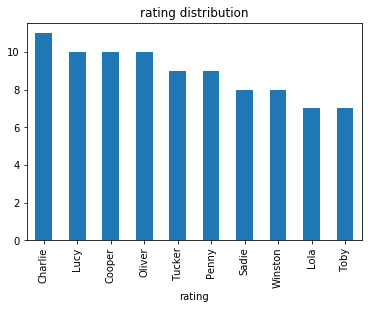

In [1200]:
plot_data=twitter_archive[twitter_archive['dog_name'] != 'None']
plot_data.dog_name.value_counts().head(10).plot(kind='bar')
plt.title('rating distribution')
plt.xlabel('rating');

The top 5 popular dog names are Charlie, Lucy, Cooper, Oliver and Tucker.

#### now, let's see the most popular dog ratings

In [1160]:
twitter_archive.rating_numerator_new.value_counts().head(6)

12    450
10    419
11    397
13    263
9     150
8     95 
Name: rating_numerator_new, dtype: int64

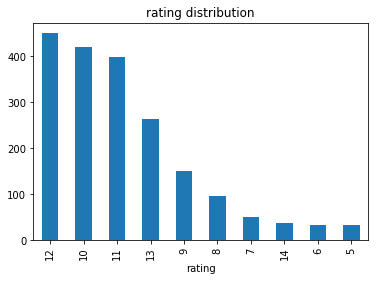

In [1198]:
twitter_archive.rating_numerator_new.value_counts().head(10).plot(kind='bar')
plt.title('rating distribution')
plt.xlabel('rating');

The rating distribution confirms that the most common dog ratings are 12, 10 ,11 and 13.

#### now, let's see the dog with low ratings

In [1161]:
twitter_archive.rating_numerator_new.value_counts()
twitter_archive[twitter_archive.rating_numerator_new ==1 ]

,tweet_id,source,text,rating_numerator_new,rating_denominator_new,dog_name,tweet_time,jpg_url,dog_breed,confidence_level,retweet_count,favorite_count,dog_stage
tweet_date,,,,,,,,,,,,,
11-20-2015,667549055577362432,Twitter Web Client,Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx,1,10,None,03:44,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,None,0.0,2396,5986,None
11-16-2015,666104133288665088,Twitter for iPhone,Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX,1,10,None,04:02,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,None,0.0,6670,14422,None
11-29-2015,670783437142401025,Twitter for iPhone,Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO,1,10,None,01:56,https://pbs.twimg.com/media/CU8Z-OxXAAA-sd2.jpg,None,0.0,419,851,None
12-11-2015,675153376133427200,Twitter for iPhone,What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0,1,10,None,03:21,https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg,None,0.0,2810,6622,None


After examining some pics, it seems that low ratings are given to ones which have no dog images in it. For ex, the ones above have a picture of fan , chicken and a caterpillar. So, it looks like that pics with dogs images usually get high rating.

#### let's explore corelation between tweets and favorite counts

In [1162]:
twitter_archive[['favorite_count', 'retweet_count','rating_numerator_new']].corr(method='pearson')

,favorite_count,retweet_count,rating_numerator_new
favorite_count,1.000000,0.917413,0.022941
retweet_count,0.917413,1.000000,0.023673
rating_numerator_new,0.022941,0.023673,1.000000


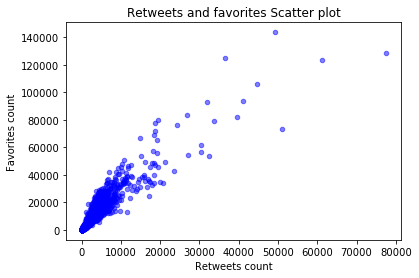

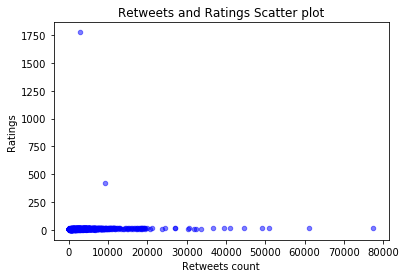

In [1204]:
twitter_archive.plot(kind = 'scatter', x = 'retweet_count', y = 'favorite_count', alpha = 0.5, color = 'blue')
plt.xlabel('Retweets count')
plt.ylabel('Favorites count')
plt.title('Retweets and favorites Scatter plot');

twitter_archive.plot(kind = 'scatter', x = 'retweet_count', y = 'rating_numerator_new', alpha = 0.5, color = 'blue')
plt.xlabel('Retweets count')
plt.ylabel('Ratings')
plt.title('Retweets and Ratings Scatter plot');

So,there doesn't seeem to be any corelation between dogs rating and the number of reweets or likes. So, dog might be rated on the basis of caption and on other factors and can get more favorites and retweets regardless of its rating. 

Also, there seems to be a strong corelation between retweets and favorite counts. So, a tweet with more retweets would likely to get more likes in comparison to tweets with less retweets. 

### box plot of rating based on dog type

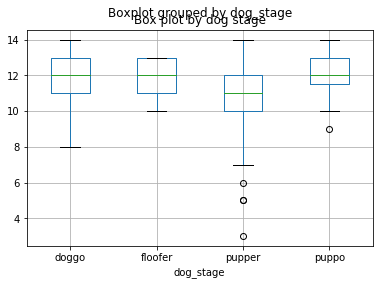

In [1163]:

twitter_archive[twitter_archive['dog_stage'] != 'None'].boxplot(column='rating_numerator_new', by='dog_stage');
plt.title('Box plot by dog stage');


In [1164]:
twitter_archive.groupby('dog_stage')['rating_numerator_new'].describe()

dog_stage       
None       count    1683.000000
           mean     11.678550  
           std      44.241239  
           min      0.000000   
           25%      10.000000  
           50%      11.000000  
           75%      12.000000  
           max      1776.000000
doggo      count    63.000000  
           mean     11.888889  
           std      1.471351   
           min      8.000000   
           25%      11.000000  
           50%      12.000000  
           75%      13.000000  
           max      14.000000  
floofer    count    8.000000   
           mean     11.875000  
           std      1.125992   
           min      10.000000  
           25%      11.000000  
           50%      12.000000  
           75%      13.000000  
           max      13.000000  
pupper     count    212.000000 
           mean     10.650943  
           std      1.755384   
           min      3.000000   
           25%      10.000000  
           50%      11.000000  
           75%      12.

After analyisng the data plot, it seems that several dogs belonging to pupper category received lower ratings. So, these oullier are pulling down puppers rating and therefore they have the minimum mean rating while we compare them to other dog stage. 
floofers have minimum rating of 10 and they have consistently rated high. 
However, considering the number of record we have for this dog type, we cannot draw out any conclusion that whether dog stage has any coorelation with rating.

#### let's find out top 10 breeds which are  most rated.

None                  306
golden_retriever      158
Labrador_retriever    107
Pembroke              95 
Chihuahua             91 
pug                   62 
toy_poodle            51 
chow                  48 
Samoyed               42 
Pomeranian            41 
Name: dog_breed, dtype: int64


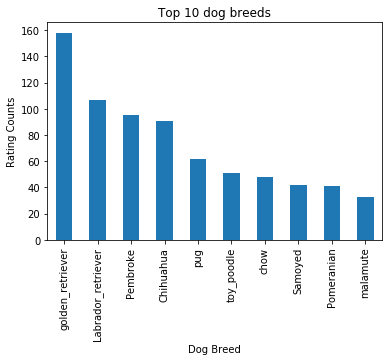

In [1215]:
plot_data=twitter_archive[twitter_archive['dog_breed'] != 'None']
plot_data.dog_breed.value_counts().head(10).plot(kind = 'bar');
print(twitter_archive.dog_breed.value_counts().head(10))
plt.xlabel('Dog Breed')
plt.ylabel('Rating Counts')
plt.title('Top 10 dog breeds');

In [1194]:
twitter_archive[(twitter_archive.dog_breed=='None') & (twitter_archive.dog_name!='None')].dog_breed.value_counts()



None    165
Name: dog_breed, dtype: int64

From the visuals, it is evident that golden retriver and labrador retreiver breeds are the most rated one. It could be because of the reason that these ones are among the most popular dog breeds in United States. Below is the dog breed ranking from american Kennel club.

https://www.akc.org/expert-advice/news/most-popular-dog-breeds-full-ranking-list/

Also, it seems that the image prediction algorithm is not doing a very good job as it is not labeling all dogs with correct breed. For instance, 165 out of 306 tweets which were not classified as dogs are actually dogs. So, it is possible that the image predictions has misclassified many of the images as not dogs.

#### Dog ratings over a period of time

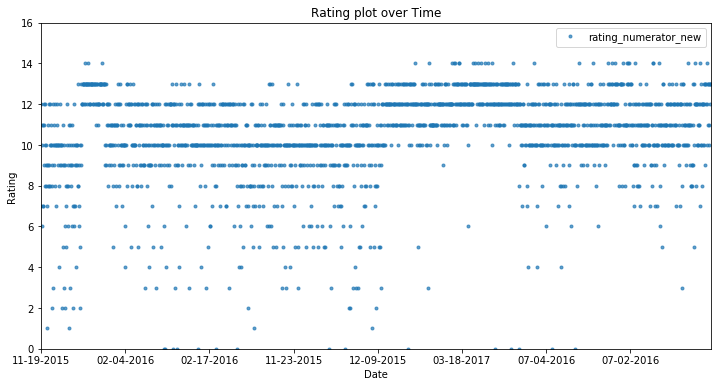

In [1213]:
twitter_archive.plot(y ='rating_numerator_new', ylim=[0,16], style = '.', alpha = .7,figsize=(12,6))
plt.title('Rating plot over Time')
plt.xlabel('Date')
plt.ylabel('Rating');

It is quite evident from the plot that dogs ratings are high expect for few outliers in the beginning. If we look at the data most of the dogs are rated 8 and above and the lower rating is for those cases, when the image in the tweet is not of a dog.